<a href="https://colab.research.google.com/github/inbatamilan573/Liver-disease-prediction-/blob/main/liver_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Liver Disease Prediction

The given data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records. The main objective of the analysis is to predict whether the person is affected with liver disease or not .

# Importing necessary libraries

In [ ]:
#Importing necessary libraries for data analysis and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing the Data set

In [ ]:
#Reading the dataset
data=pd.read_csv("indian_liver_patient.csv")
df=data.copy()

In [ ]:
df.shape

(583, 11)

In [ ]:
#Checking top 5 data
df.head(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
#Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
#Overview of data
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


1    416
2    167
Name: Dataset, dtype: int64


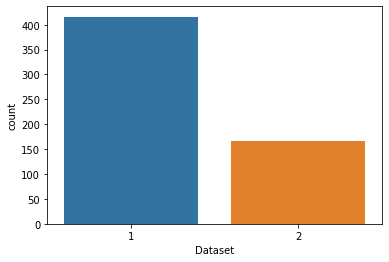

In [ ]:
#Visualisation of no of patients affected with liver disease vs no disease
sns.countplot(data=df,x='Dataset')
print(df["Dataset"].value_counts())

It is seen from the above graph the postive records is almost three times the number of negative ones. 1 denotes the people with liver disease and 2 denotes no disease

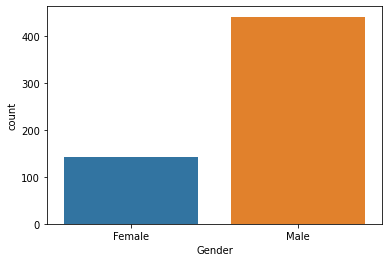

In [ ]:
#Visualisation of no of male and female
sns.countplot(data=df,x ='Gender')

From the above graph it is seen that the number of male record are high compared to the female records

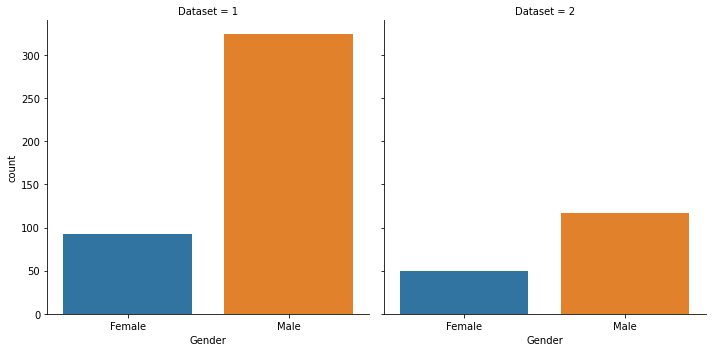

In [ ]:
#visualisation of people with liver disease vs gender
sns.catplot(data=df,x="Gender",col="Dataset",kind="count")

It is seen that person who are affected with disease are mostly of gender male.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f963cbfa8d0>,
      dtype=object)

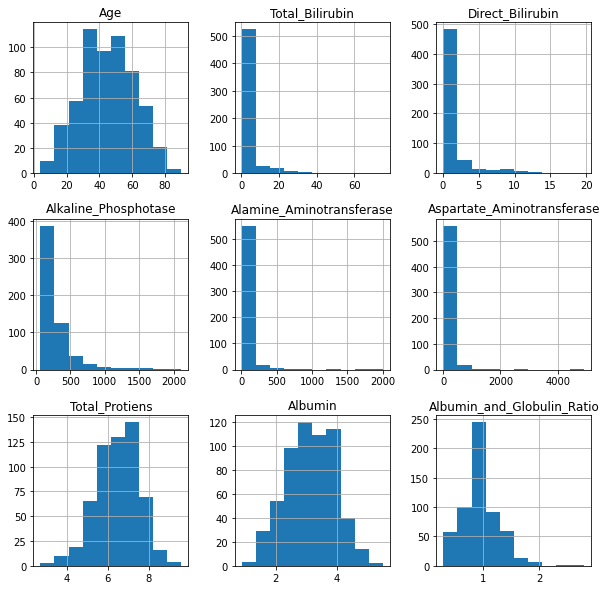

In [ ]:
#visualisation of column distribution
df.hist(["Age","Total_Bilirubin","Direct_Bilirubin","Alkaline_Phosphotase","Alamine_Aminotransferase","Aspartate_Aminotransferase","Total_Protiens","Albumin","Albumin_and_Globulin_Ratio"],figsize=(10,10))

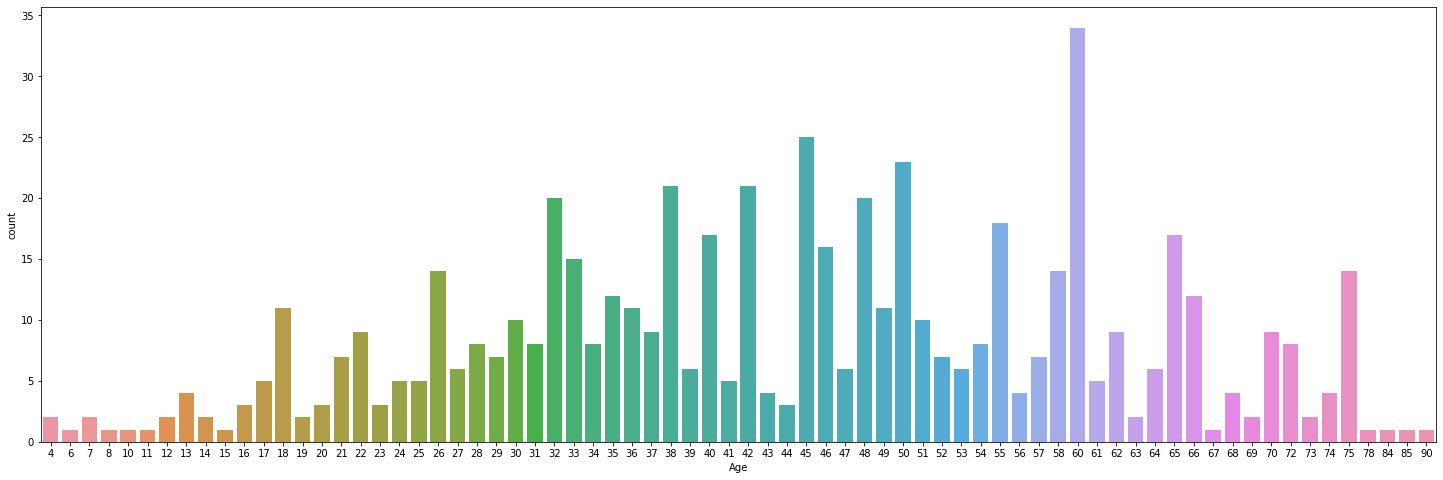

In [ ]:
#Age distribution
plt.figure(figsize=(25,8))
sns.countplot(data=df,x ='Age')

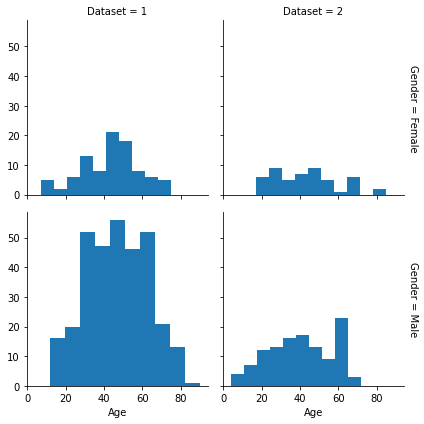

In [ ]:
g = sns.FacetGrid(df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age")

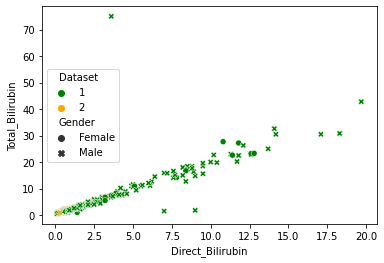

In [ ]:
#Relationship between Direct_Bilirubin and Total_Bilirubin
sns.scatterplot(x="Direct_Bilirubin",y="Total_Bilirubin",hue="Dataset",style="Gender"\
                ,data=df,palette=['green','orange'])

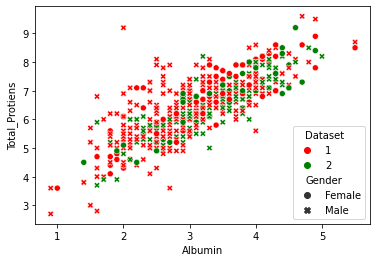

In [ ]:
#Relationship between Albumin and Total_Protein
sns.scatterplot(x="Albumin",y="Total_Protiens",hue="Dataset",style="Gender",data=df,\
                palette=["red","green"])

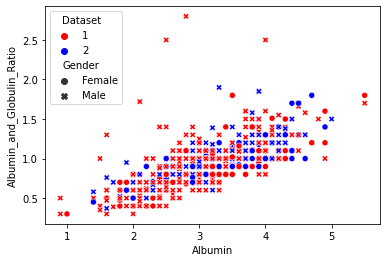

In [ ]:
#Relationship between Albumin and Albumin_and_Globulin_Ratio
sns.scatterplot(x="Albumin",y="Albumin_and_Globulin_Ratio",hue="Dataset",style="Gender",data=df, \
                palette=["red","blue"])

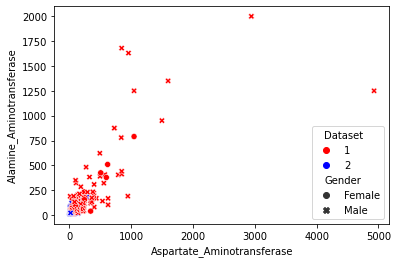

In [ ]:
#Relationship between Aspartate_Aminotransferase and Alamine_Aminotransferase
sns.scatterplot(x="Aspartate_Aminotransferase",y="Alamine_Aminotransferase",hue="Dataset",\
                style="Gender",data=df,palette=["red","blue"])

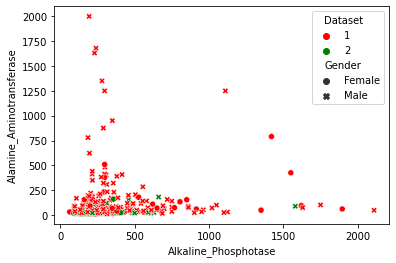

In [ ]:
#Relationship between Alkaline_Phosphotase and Alamine_Aminotransferase
sns.scatterplot(x="Alkaline_Phosphotase",y="Alamine_Aminotransferase", hue="Dataset", \
                style="Gender",data=df,palette=["red","green"])

It is seen that there exist a linear relationship with Direct_Bilirubin and Total_Bilirubin

In [ ]:
#checking columns which contains null value
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

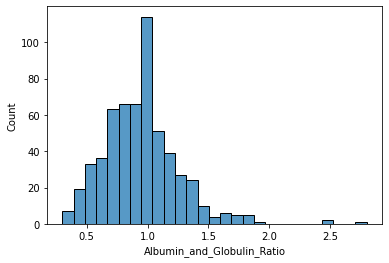

In [ ]:
#Analysing Albumin_and_Globulin_Ratio column which has null value
sns.histplot(x="Albumin_and_Globulin_Ratio", data=df)

Text(0.5, 1.0, 'Albumin_and_Globulin_Ratio')

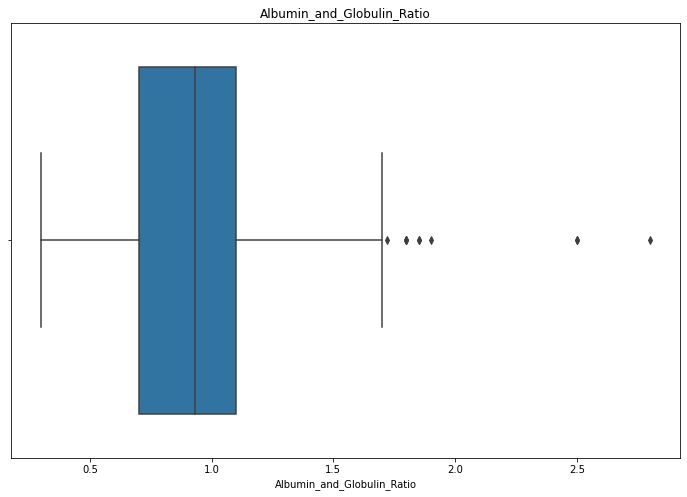

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Albumin_and_Globulin_Ratio",data=df)
plt.title("Albumin_and_Globulin_Ratio")

In [ ]:
#Filling in the missing values with median because it has few outliers
df['Albumin_and_Globulin_Ratio']=df["Albumin_and_Globulin_Ratio"].fillna\
(df["Albumin_and_Globulin_Ratio"].median())

In [ ]:
#checking dataset again for null values
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [ ]:
#Correlation
df.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.215968,-0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206015,-0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.199850,-0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233784,-0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002254,-0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.069930,-0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233828,0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686091,0.161388
Albumin_and_Globulin_Ratio,-0.215968,-0.206015,-0.199850,-0.233784,-0.002254,-0.069930,0.233828,0.686091,1.000000,0.162144
Dataset,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.162144,1.000000


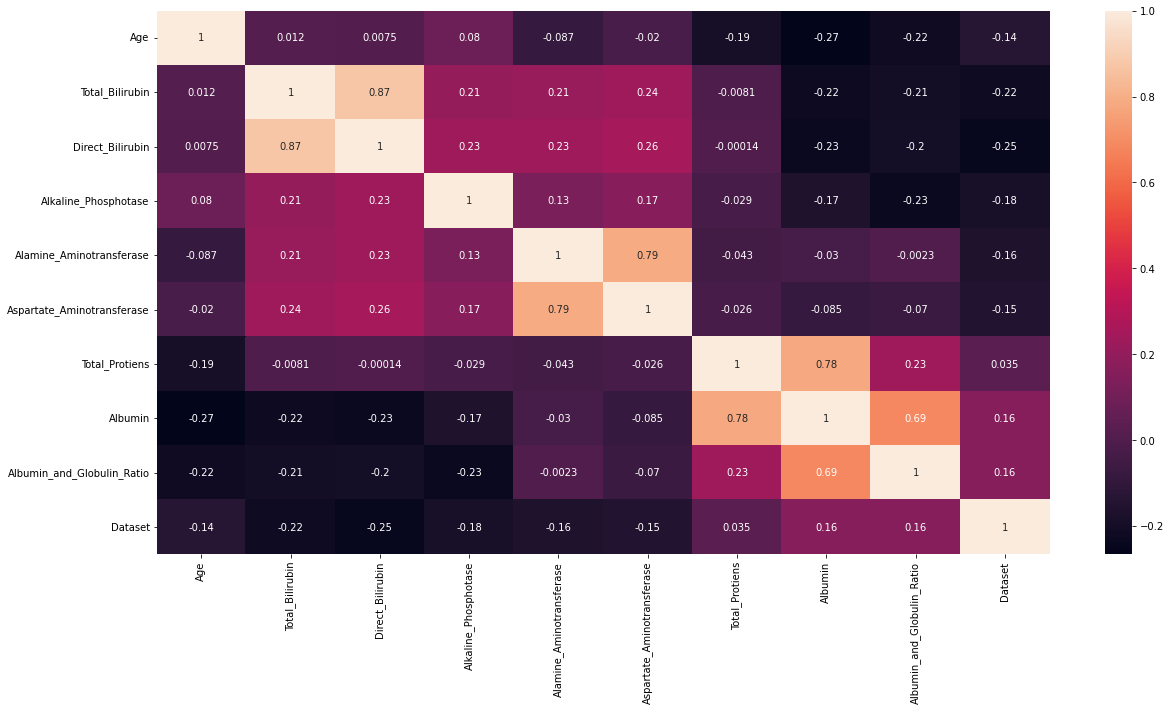

In [ ]:
#correlation using heatmap
co=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(co,annot=True)

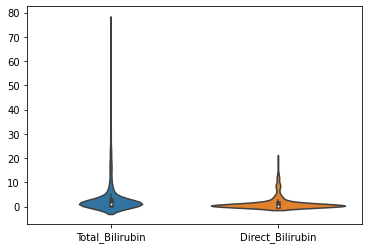

In [ ]:
#correlation between Total_Bilirubin and Direct_Bilirubin is high so we can drop any one
#checking variance to choose which one to drop using violin plot
dt = df[["Total_Bilirubin", "Direct_Bilirubin"]]
sns.violinplot(data=dt)

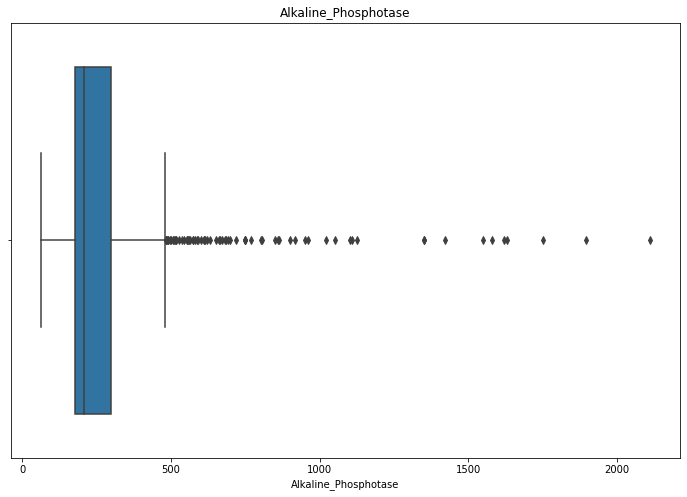

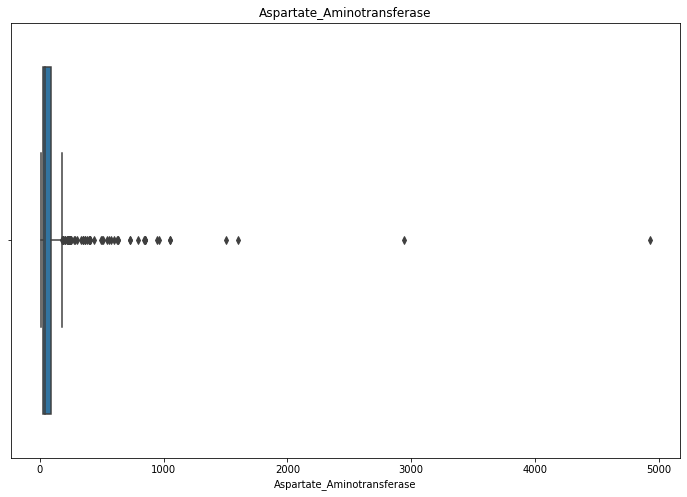

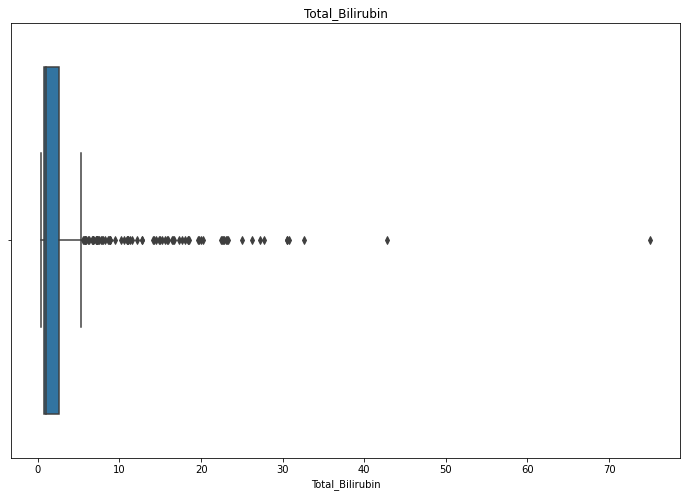

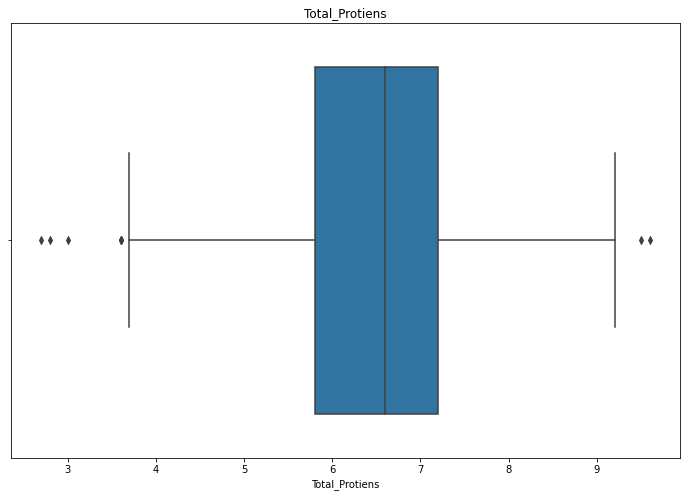

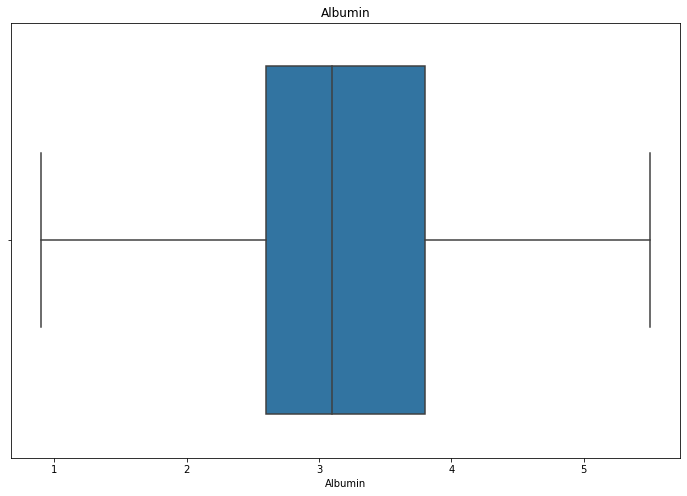

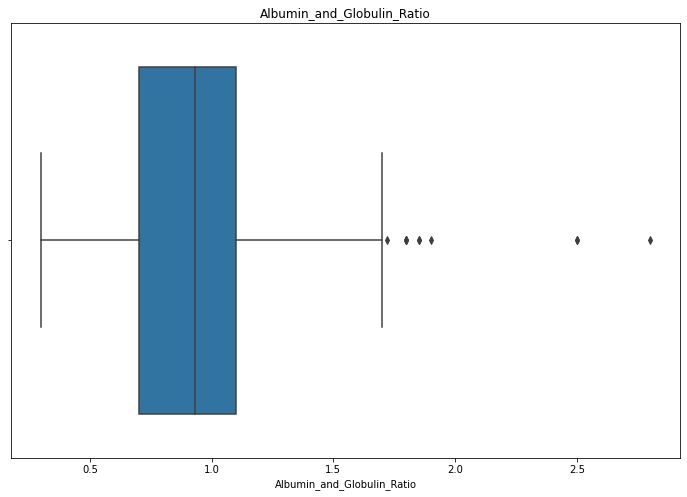

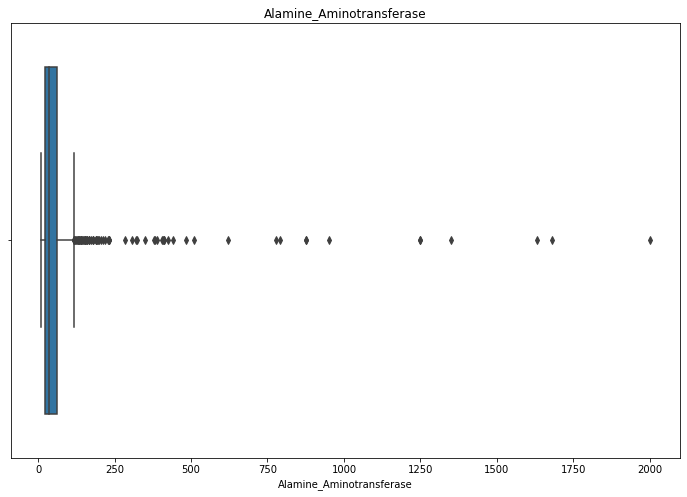

In [ ]:
#plotting the columns to see if any outliers is present
c=["Alkaline_Phosphotase","Aspartate_Aminotransferase","Total_Bilirubin","Total_Protiens","Albumin","Albumin_and_Globulin_Ratio","Alamine_Aminotransferase"]
for i in c:
    plt.figure(figsize=(12,8))
    sns.boxplot(x=i,data=df)
    plt.title(i)

It is seen that almost all the column has outliers. Hence we replace all the outliers with the value at the specified quantile.

In [ ]:
#handling outliers in each column
cols=["Alkaline_Phosphotase","Aspartate_Aminotransferase"]
for i in cols:
    max=df[i].quantile(0.88)
    df[i]=(np.where(df[i]>max,max,df[i]))


In [ ]:
#handling outliers in each column
max=df["Total_Bilirubin"].quantile(0.85)
df["Total_Bilirubin"]=(np.where(df["Total_Bilirubin"]>max,max,df["Total_Bilirubin"]))
max=df["Direct_Bilirubin"].quantile(0.85)
df["Direct_Bilirubin"]=(np.where(df["Direct_Bilirubin"]>max,max,df["Direct_Bilirubin"]))
max2=df["Alamine_Aminotransferase"].quantile(0.87)
df["Alamine_Aminotransferase"]=(np.where(df["Alamine_Aminotransferase"]>max2,max2,df["Alamine_Aminotransferase"]))

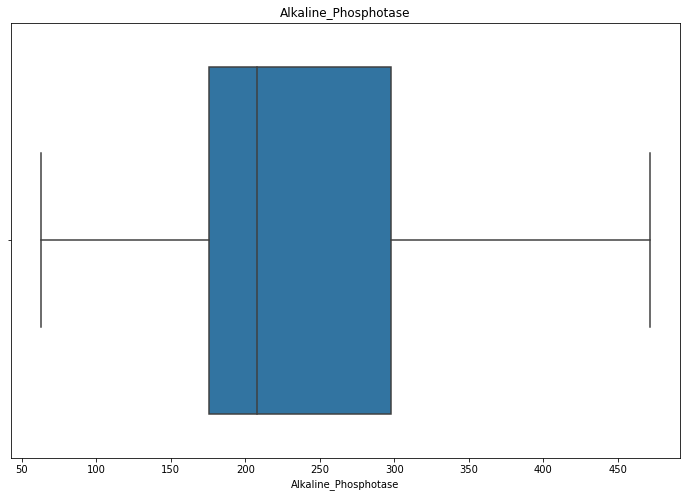

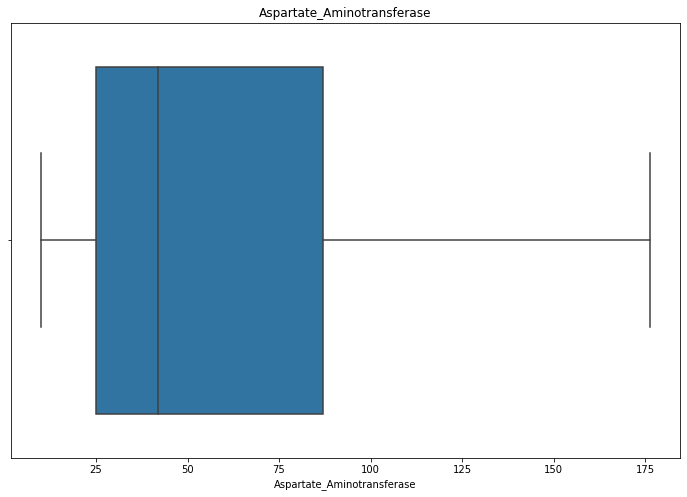

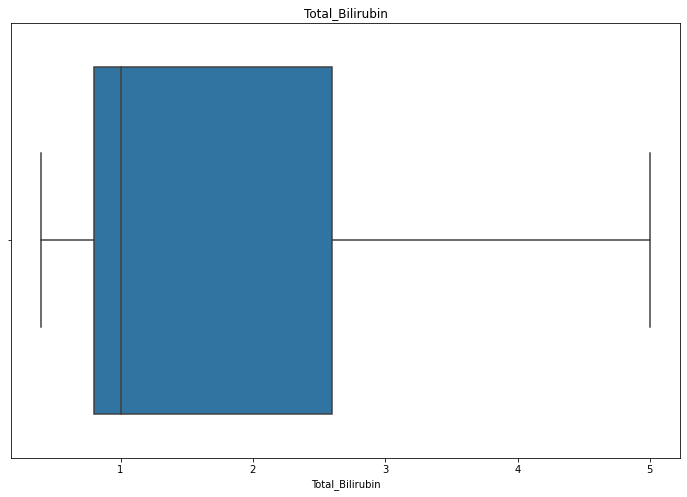

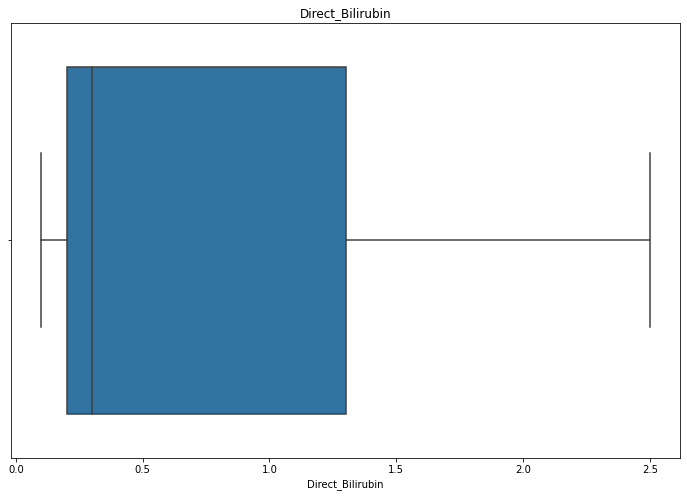

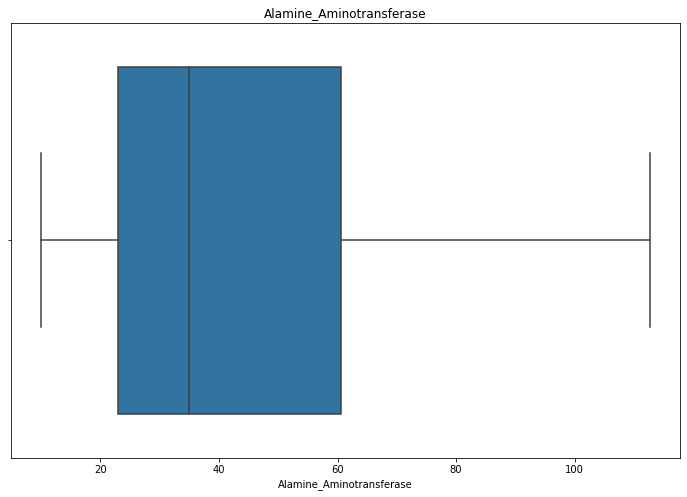

In [ ]:
#visualising columns after removal of outliers
c=["Alkaline_Phosphotase","Aspartate_Aminotransferase","Total_Bilirubin","Direct_Bilirubin","Alamine_Aminotransferase"]
for i in c:
    plt.figure(figsize=(12,8))
    sns.boxplot(x=i,data=df)
    plt.title(i)

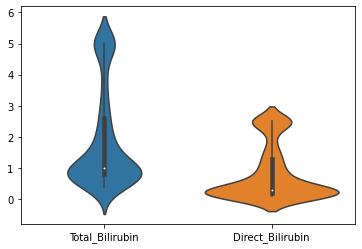

In [ ]:
#correlation between Total_Bilirubin and Direct_Bilirubin is high so we can drop any one
#checking variance to choose which one to drop using violin plot
dt = df[["Total_Bilirubin", "Direct_Bilirubin"]]
sns.violinplot(data=dt,inner='box')

In [ ]:
#dropping column with low variance because it has less predictive power
df=df.drop(["Direct_Bilirubin"],axis=1)

In [ ]:
df.describe()

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,1.876844,250.042882,47.371664,64.398628,6.483190,3.141852,0.946947,1.286449
std,16.189833,1.563983,106.930375,32.207553,52.730465,1.085451,0.795519,0.318495,0.452490
min,4.000000,0.400000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,5.000000,471.600000,112.680000,176.320000,9.600000,5.500000,2.800000,2.000000


In [ ]:
#Converting categorical data("gender") to numeric
df=pd.get_dummies(df,drop_first=True)

In [ ]:
#Checking dataset after converting gender to numeric column
df.head()

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Male
0,65,0.7,187.0,16.0,18.0,6.8,3.3,0.90,1,0
1,62,5.0,471.6,64.0,100.0,7.5,3.2,0.74,1,1
2,62,5.0,471.6,60.0,68.0,7.0,3.3,0.89,1,1
3,58,1.0,182.0,14.0,20.0,6.8,3.4,1.00,1,1
4,72,3.9,195.0,27.0,59.0,7.3,2.4,0.40,1,1


In [ ]:
#Splitting input and output
x=df.drop(["Dataset"],axis=1).values
y=df["Dataset"].values

In [ ]:
x

array([[ 65.  ,   0.7 , 187.  , ...,   3.3 ,   0.9 ,   0.  ],
       [ 62.  ,   5.  , 471.6 , ...,   3.2 ,   0.74,   1.  ],
       [ 62.  ,   5.  , 471.6 , ...,   3.3 ,   0.89,   1.  ],
       ...,
       [ 52.  ,   0.8 , 245.  , ...,   3.2 ,   1.  ,   1.  ],
       [ 31.  ,   1.3 , 184.  , ...,   3.4 ,   1.  ,   1.  ],
       [ 38.  ,   1.  , 216.  , ...,   4.4 ,   1.5 ,   1.  ]])

In [ ]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.3, random_state = 1234)

# scaling the data

In [ ]:
#Scaling x with Standard Scaler
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x_train[:,:-1]=s.fit_transform(x_train[:,:-1])
x_test[:,:-1]=s.transform(x_test[:,:-1])

In [ ]:
#Declaring model name and accuracy that is needed to be found for later evaluation of model
model=["Logistic regression","Random Forest Classifier","K-Neighbor Classifier"]
acc=[] #for storing accuracy of models
rec=[] #for storing recall rate of model
f1=[] #for storing f1 score of models
cross_score=[] # for storing cross validation score of models
roc_auc=[] #for storing auc score of models

# Logistic Regression

score-train data: 0.7352941176470589
score-test data: 0.7428571428571429
classification report: 
               precision    recall  f1-score   support

           1       0.76      0.94      0.84       127
           2       0.58      0.23      0.33        48

    accuracy                           0.74       175
   macro avg       0.67      0.58      0.58       175
weighted avg       0.71      0.74      0.70       175

accuracy: 
 0.7428571428571429
cross validation Score 
mean: 0.69 


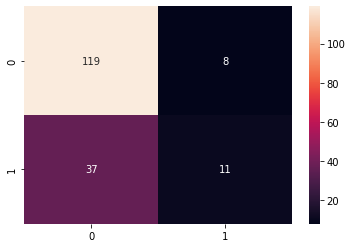

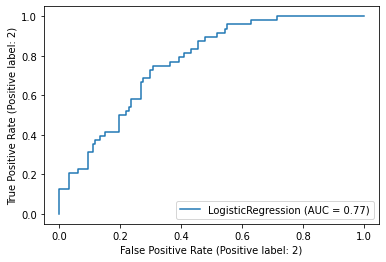

In [ ]:
#Training the LogisticRegression model on the Training set
from sklearn.metrics import accuracy_score,plot_roc_curve,roc_auc_score,classification_report,confusion_matrix,accuracy_score,recall_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
l=LogisticRegression()
l.fit(x_train,y_train)

#predicting output
y_pred=l.predict(x_test)

#calculating accuracy score of both train and test data
print("score-train data:", l.score(x_train,y_train))
print("score-test data:", l.score(x_test,y_test))

#printing classification report
print("classification report: \n",classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")

#appending evaluation parameter for model selection at last
acc.append(accuracy_score(y_test,y_pred))
print("accuracy: \n",accuracy_score(y_test,y_pred))
rec.append(recall_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred))

#plotting roc curve and calculating roc auc score
plot_roc_curve(l,x_test,y_test)
auc = roc_auc_score(y_test,l.predict_proba(x_test)[:, 1])
roc_auc.append(auc )

#calculating cross validation score
score=cross_val_score(l,x,y,cv=5)
print('cross validation Score \nmean: {} '.format(round(score.mean(),2)))
cross_score.append(score.mean())


# Random Forest Classifier

score-train data: 0.9877450980392157
score-test data: 0.7828571428571428
classification report: 
               precision    recall  f1-score   support

           1       0.82      0.90      0.86       127
           2       0.64      0.48      0.55        48

    accuracy                           0.78       175
   macro avg       0.73      0.69      0.70       175
weighted avg       0.77      0.78      0.77       175

accuracy: 
 0.7828571428571428
cross validation Score 
mean: 0.68 


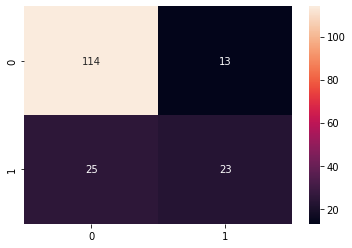

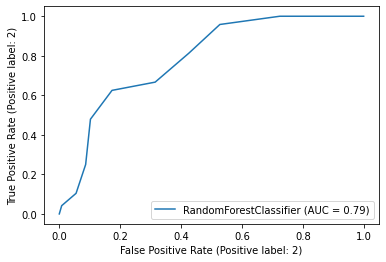

In [ ]:
#Training the RandomForestClassifier model on the Training set
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=11,random_state=3)
rf.fit(x_train,y_train)

#predicting output
y_pred=rf.predict(x_test)

#calculating accuracy score of both train and test data
print("score-train data:", rf.score(x_train,y_train))
print("score-test data:", rf.score(x_test,y_test))

#printing classification report
print("classification report: \n",classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")

#appending evaluation parameter for model selection at last
acc.append(accuracy_score(y_test,y_pred))
print("accuracy: \n",accuracy_score(y_test,y_pred))
rec.append(recall_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred))

#plotting roc curve and calculating roc auc score
plot_roc_curve(rf,x_test,y_test)
auc = roc_auc_score(y_test,rf.predict_proba(x_test)[:, 1])
roc_auc.append(auc )

#calculating cross validation score
score=cross_val_score(rf,x,y,cv=5)
cross_score.append(score.mean())
print('cross validation Score \nmean: {} '.format(round(score.mean(),2)))



Although the Random forest classifier provides a better accuracy and auc score than the logistic regression, It appears to be a overfit because its accuracy of training data is almost 98 while the accuracy of test data is just 78.

# K-Neighbor Classifier

score-train data: 0.7598039215686274
score-test data: 0.7428571428571429
classification report: 
               precision    recall  f1-score   support

           1       0.79      0.88      0.83       127
           2       0.55      0.38      0.44        48

    accuracy                           0.74       175
   macro avg       0.67      0.63      0.64       175
weighted avg       0.72      0.74      0.73       175

accuracy: 
 0.7428571428571429
cross validation Score 
mean: 0.67 


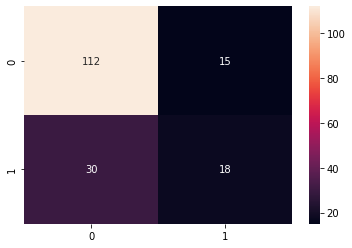

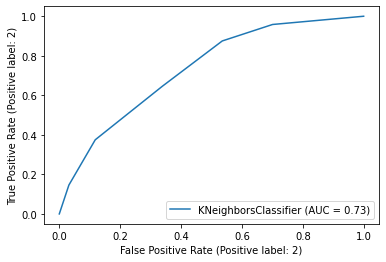

In [ ]:
#Training the KNeighborsClassifier model on the Training set
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier(n_neighbors=7,metric='minkowski', p=2)
k.fit(x_train,y_train)

#predicting output
y_pred=k.predict(x_test)

#calculating accuracy score of both train and test data
print("score-train data:", k.score(x_train,y_train))
print("score-test data:", k.score(x_test,y_test))

#printing classification report
print("classification report: \n",classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")

#appending evaluation parameter for model selection at last
acc.append(accuracy_score(y_test,y_pred))
print("accuracy: \n",accuracy_score(y_test,y_pred))
rec.append(recall_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred))

#plotting roc curve and calculating roc auc score
plot_roc_curve(k,x_test,y_test)
auc = roc_auc_score(y_test,k.predict_proba(x_test)[:, 1])
roc_auc.append(auc )

#calculating cross validation score
score=cross_val_score(k,x,y,cv=5)
print('cross validation Score \nmean: {} '.format(round(score.mean(),2)))
cross_score.append(score.mean())


# Comparing performance of models

In [ ]:
# printing accuracy recall,auc score and cross value for different models
for i in range(0,len(acc)):
    print(model[i],"\naccuracy :",round(acc[i],2)," Recall :",round(rec[i],2)," auc value :",round(roc_auc[i],2)," cross val score: ",round(cross_score[i],2))

Logistic regression 
accuracy : 0.74  Recall : 0.94  auc value : 0.77  cross val score:  0.69
Random Forest Classifier 
accuracy : 0.78  Recall : 0.9  auc value : 0.79  cross val score:  0.68
K-Neighbor Classifier 
accuracy : 0.74  Recall : 0.88  auc value : 0.73  cross val score:  0.67


# Model selection

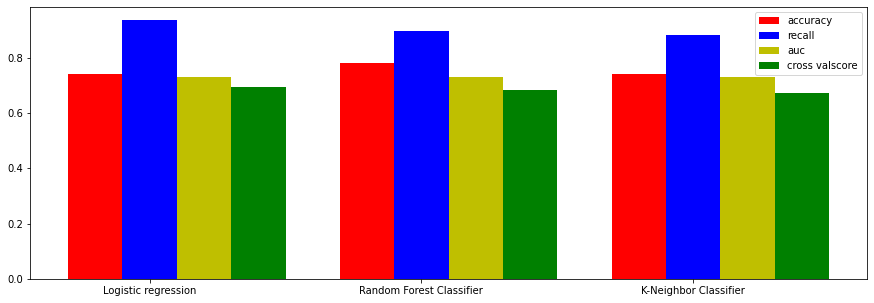

In [ ]:
#visualised comparison of performance of models
N = 6
ind = np.arange(3)
width = 0.2
plt.figure(figsize=(15,5))
#plot for accuracy
bar1 = plt.bar(ind, acc, width, color = 'r')

#plot for Recall
bar2 = plt.bar(ind+width, rec, width, color='b')

#plot for auc  Score
bar3 = plt.bar(ind+width*2, auc, width, color='y')

#plot for cross validation Score
bar4 = plt.bar(ind+width*3, cross_score, width, color='g')
plt.xticks(ind+width,model)
plt.legend( (bar1, bar2,  bar3, bar4), ('accuracy', 'recall', 'auc','cross valscore') ,loc=1)
plt.show()



As per the above result, although the Random forest classifier shows better result in terms of accuracy, its recall, cross validation score and f1 score are comparatively low than the logistic regression.Also the Random forest classifier looks like a overfitting. Morever recall rate is very important in this scenario because failure to detect positive cases will be a huge risk. Hence, Logistic regression would be better model in this scenario.

# Hyper parameter tuning

In [ ]:
#Tuning parameters using GridSearchCV and RepeatedStratifiedKFold
#importing necessary library
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV
#Declaring model name and evaluation parameters that is needed to be found for later evaluation of model
m=["logistic regression",  "random forest" ,"KNN"]
acc1=[] #for storing accuracy of models
auc1=[] #for storing auc score of models
rec1=[] #for storing recall rate of models
cv1=[]  # for storing cross validation score of models

# Logistic Regression

In [ ]:
#specifying the parameters and the necessary value that it may take
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty =  ['none', 'l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]


#converting the parameters to dictionary type for GridSearchCV
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#passing the parameter to GridSearchCV and fit the model
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)

#getting the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.726563 using {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


score-train data: 0.7524509803921569
score-test data: 0.7257142857142858
classification report: 
               precision    recall  f1-score   support

           1       0.76      0.91      0.83       127
           2       0.50      0.23      0.31        48

    accuracy                           0.73       175
   macro avg       0.63      0.57      0.57       175
weighted avg       0.69      0.73      0.69       175

accuracy: 
 0.7257142857142858
 cross validation Score 
mean: 0.72


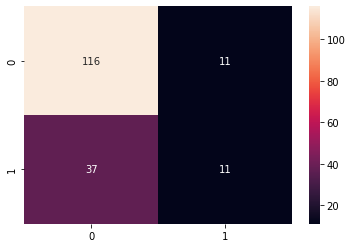

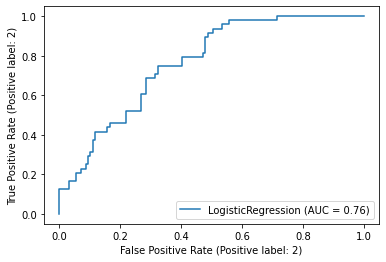

In [ ]:
#importing required classes
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,accuracy_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
lr=LogisticRegression(C= 100, penalty= 'none', solver= 'newton-cg')
lr.fit(x_train,y_train)

#predicting output
y_pred=lr.predict(x_test)

#calculating accuracy score of both train and test data
print("score-train data:", lr.score(x_train,y_train))
print("score-test data:", lr.score(x_test,y_test))

#printing classification report
print("classification report: \n",classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")

#appending evaluation parameter for model selection at last
acc1.append(accuracy_score(y_test,y_pred))
print("accuracy: \n",accuracy_score(y_test,y_pred))
rec1.append(recall_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred))

#plotting roc curve and calculating roc auc score
plot_roc_curve(lr,x_test,y_test)
auc = roc_auc_score(y_test,lr.predict_proba(x_test)[:, 1])
auc1.append(auc )

#calculating cross validation score
score=cross_val_score(lr,x,y,cv=5)
print(' cross validation Score \nmean: {}'.format(round(score.mean(),2)))
cv1.append(score.mean())


# RandomForestClassifier

In [ ]:
model = RandomForestClassifier()
#specifying the parameters and the necessary value that it may take
grid = {'n_estimators' : [15],
'min_samples_split':[24,50,86],
'min_samples_leaf':[1,2,3]
       }
#passing the parameter to GridSearchCV and fit the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid,  cv=cv, scoring='accuracy',n_jobs=-1, error_score=0)
grid_result = grid_search.fit(x, y)

#getting the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.703721 using {'min_samples_leaf': 3, 'min_samples_split': 86, 'n_estimators': 15}


score-train data: 0.7450980392156863
score-test data: 0.7257142857142858
classification report: 
               precision    recall  f1-score   support

           1       0.74      0.95      0.83       127
           2       0.50      0.12      0.20        48

    accuracy                           0.73       175
   macro avg       0.62      0.54      0.52       175
weighted avg       0.68      0.73      0.66       175

accuracy: 
 0.7257142857142858
 cross validation Score 
mean:0.72


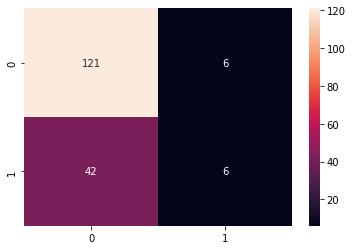

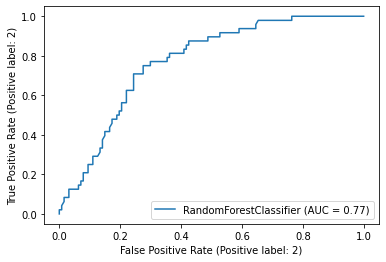

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=3,min_samples_leaf= 1,min_samples_split=86,n_estimators= 15)
rfc.fit(x_train,y_train)

#predicting output
y_pred=rfc.predict(x_test)

#calculating accuracy score of both train and test data
print("score-train data:", rfc.score(x_train,y_train))
print("score-test data:", rfc.score(x_test,y_test))

#printing classification report
print("classification report: \n",classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")

#appending evaluation parameter for model selection at last
acc1.append(accuracy_score(y_test,y_pred))
print("accuracy: \n",accuracy_score(y_test,y_pred))
rec1.append(recall_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred))

#plotting roc curve and calculating roc auc score
plot_roc_curve(rfc,x_test,y_test)
auc = roc_auc_score(y_test,rfc.predict_proba(x_test)[:, 1])
auc1.append(auc )

#calculating cross validation score
score=cross_val_score(rfc,x,y,cv=5)
print(' cross validation Score \nmean:{}'.format(round(score.mean(),2)))
cv1.append(score.mean())


# KNeighborsClassifier

In [ ]:
n_neighbors = range(1, 30,3)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
model = KNeighborsClassifier()
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

#passing the parameter to GridSearchCV and fit the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)

#getting the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.712381 using {'metric': 'manhattan', 'n_neighbors': 28, 'weights': 'uniform'}


score-train data: 0.6911764705882353
score-test data: 0.6971428571428572
classification report: 
               precision    recall  f1-score   support

           1       0.73      0.91      0.81       127
           2       0.35      0.12      0.18        48

    accuracy                           0.70       175
   macro avg       0.54      0.52      0.50       175
weighted avg       0.63      0.70      0.64       175

accuracy: 
 0.6971428571428572
crossvalidation Score 
mean: 0.72


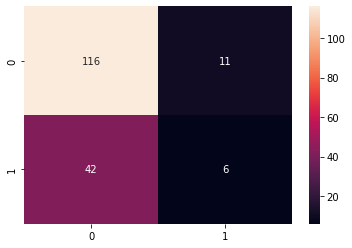

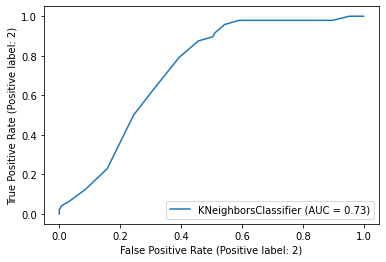

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=28,metric='manhattan', p=2,weights='uniform')
kn.fit(x_train,y_train)

#predicting output
y_pred=kn.predict(x_test)

#calculating accuracy score of both train and test data
print("score-train data:", kn.score(x_train,y_train))
print("score-test data:", kn.score(x_test,y_test))

#printing classification report
print("classification report: \n",classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")

#appending evaluation parameter for model selection at last
acc1.append(accuracy_score(y_test,y_pred))
print("accuracy: \n",accuracy_score(y_test,y_pred))
rec1.append(recall_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred))

#plotting roc curve and calculating roc auc score
plot_roc_curve(kn,x_test,y_test)
auc = roc_auc_score(y_test,kn.predict_proba(x_test)[:, 1])
auc1.append(auc )

#calculating cross validation score
score=cross_val_score(kn,x,y,cv=5)
print('crossvalidation Score \nmean: {}'.format(round(score.mean(),2)))
cv1.append(score.mean())


# Model selection after hyper parameter tuning

In [ ]:
# printing accuracy recall,auc score and cross value for different models
for i in range(0,len(acc1)):
    print(m[i],"\naccuracy :",round(acc1[i],2), "cv:",round(cv1[i],2)," Recall :",round(rec1[i],2)," auc value :",round(auc1[i],2))

logistic regression 
accuracy : 0.73 cv: 0.72  Recall : 0.91  auc value : 0.76
random forest 
accuracy : 0.73 cv: 0.72  Recall : 0.95  auc value : 0.77
KNN 
accuracy : 0.7 cv: 0.72  Recall : 0.91  auc value : 0.73


After tuning of hyperparameters and comparing the accuracy, cross validation score, recall and auc score it is found that random forest gives a better performance than other models. so random forest classifer with appropriate hyper parameter tuning performs better in this scenario than the other models

In [ ]:
#saving the model
import pickle as pk
pk.dump(rfc,open('liver_disease_prediction.pkl','wb'))